<a href="https://colab.research.google.com/github/Mario-U-KY/DataScience/blob/main/2_1_Data_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>2.1 Data Manipulation</h1>

<h2>2.1.1 Getting Started</h2>

In [54]:
import torch
import numpy as np

In [3]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [4]:
x.shape

torch.Size([12])

In [6]:
x.numel()

12

In [7]:
X = x.reshape(3,4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

reshape를 자동 계산하게 만들기 위해 한쪽에 -1을 대신 넣을 수도 있다.

In [9]:
X = x.reshape(3,-1)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [10]:
X = x.reshape(-1,4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

내부에 0이나 1등의 특정한 상수값으로 채우고 싶다면 아래와 같은 함수 사용하자.

In [11]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [12]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

딥러닝을 위해서 텐서 내부에 random 값들을 매핑 시키는 경우도 존재. 아래와 같은 함수 사용시 평균 0, 표준편차 1인 가우시안 분포 내에서 값을 임의로 매핑할 수 있다.

In [15]:
torch.randn(3,4)

tensor([[ 0.6724,  0.8864, -0.3769, -0.7732],
        [-1.0842, -2.1175,  1.7729, -0.3073],
        [-0.5526, -0.5991,  0.5740,  0.2144]])

In [19]:
torch.randn(2,3,4)

tensor([[[-1.1778, -0.2496, -1.5300,  0.2939],
         [-0.2783, -0.0634, -3.6110, -1.2267],
         [-0.8925,  0.7554,  0.3565,  0.4290]],

        [[-1.0804,  1.2844,  0.3135,  0.9707],
         [-0.3408, -1.4840,  0.2007,  0.0136],
         [ 1.0244, -0.0304, -0.3178,  0.7478]]])

특정값으로 세팅하면서 생성도 가능.

In [20]:
torch.tensor([[1,2,3],[2,3,4],[3,4,5]])

tensor([[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]])

<h2>2.1.2 Operations</h2>

In [21]:
x = torch.tensor([1.0,2,4,8])
y = torch.tensor([2,2,2,2])
x+y, x-y, x*y, x/y, x**y


(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [22]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

선형대수 연산 또한 가능. dot products, matrix multiplication
<br>또한 concatenate multiple tensors 도 가능하다. 어떤 축으로 병합할지 또한 지정 가능.<br>
아래의 연산 결과를 확인하면 각각 row단위 병합, column단위 병합인 텐서구조로 concatenated 됨을 확인할 수 있다.

In [26]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
X_C = torch.cat((X,Y),dim = 0)
Y_C = torch.cat((X,Y),dim=1)
X_C, Y_C

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [27]:
X_C.shape, Y_C.shape

(torch.Size([6, 4]), torch.Size([3, 8]))

논리 연산자를 통해서, binary tensor또한 만들 수 있다.
다만 shape가 일치해야 가능함

In [29]:
X==Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

X_C == Y_C 는 오류 발생 (Shape가 일치하지 않으므로)

In [31]:
X.sum()

tensor(66.)

sum 함수로 tensor 내의 모든 elements들의 합을 구할 수 있다.

<h2>2.1.3 Broadcasting Mechanism</h2>

지금까지는 같은 shape일 때의 요소단위 operation을 진행했다면, boradcasting mechanism을 사용해서 그렇지 않은 경우에도 연산 작업을 추진할 수 있다. 

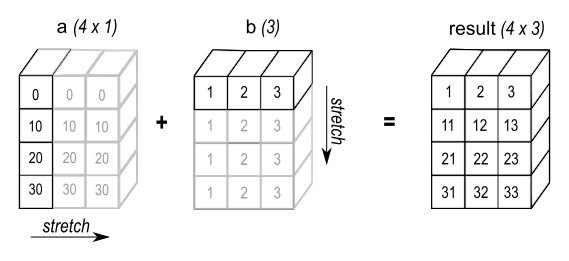

In [33]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a, b


(tensor([[0],
         [1],
         [2]]), tensor([[0, 1]]))

위의 각 텐서구조는 3,1 그리고 1,2 의 shape이므로 연산이 안 될 것 같지만, 각각의 값을 위의 이미지처럼 stretch 즉 복사해 부족한 행 혹은 열에 붙여넣기 한 뒤 연산을 수행한다.

In [34]:
a+b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

<h2>Indexing and Slicing</h2>

Python의 array처럼 인덱싱 그리고 슬라이싱이 가능하다.

In [35]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [36]:
X[-1]

tensor([ 8.,  9., 10., 11.])

In [39]:
X[1:3]#파이썬에서와 같이 0,1,2,3... 순으로 진행됨 이 경우, 1~2 열을 호출

tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

특정 위치를 지정해서 내부 element를 변경하는 것이 가능하다.

In [42]:
X[1,2] = 9
X#1행, 2열의 요소가 9로 변경된 것을 확인할 수 있음(0,1,2... 기준)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

슬라이싱 + 대입 연산자로 한번에 여러 요소를 변경하는 것이 가능하다.

In [45]:
X[0:2,:] = 12 #0,1 행, 모든 열의 값을 12로 변환
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

<h2>2.1.5 Saving Memory</h2>

python의 동적 메모리 할당으로 인해, 특정 변수의 값이 변화하거나, 다른 구조 혹은 특정 연산을 수행할 시에 변수가 참조하고 있는 위치 정보가 변화한다.

In [46]:
before = id(Y)
Y = Y+X
id(Y)==before

False

In [48]:
before, id(Y)#참조하는 위치가 달라짐

(140411235831984, 140411235530608)

이렇게 연산시 메모리 할당이 달라지는 것으로 인해 메모리 누수가 발생. in-place operation을 하면 좋다.

In [51]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X+Y #inplace operation을 위해 Z[:]사용, 같은 메모리 위치를 참조하면서 연산 결과를 반환할 수 있다.
print('id(Z):', id(Z))

id(Z): 140411235641392
id(Z): 140411235641392


다른 방법으로 X[:] = X + Y나 X+= Y의 연산방법을 사용하면 기존의 할당된 메모리 위치를 유지하면서 연산및 결과 반환을 수행할 수 있다.

In [53]:
before = id(X)
X += Y
id(X) == before, before, id(X)

(True, 140411235832848, 140411235832848)

<h2>2.1.6 Conversion to Other Python Objects</h2>

numpy 와 tensor는 같은 메모리 위치를 유지하면서 변환이 가능하다.

In [55]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

사이즈는 1인 tensor의 경우 itme() 메서드나 float, int 등 파이썬 내장 함수로 값을 반환할 수 있다.

In [56]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

<h3>Exercises</h3>

In [58]:
X,Y

(tensor([[40., 38., 44., 42.],
         [38., 40., 42., 44.],
         [32., 33., 34., 35.]]), tensor([[14., 13., 16., 15.],
         [13., 14., 15., 16.],
         [12., 12., 12., 12.]]))

In [59]:
X>Y

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [60]:
X<Y

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [64]:
a = torch.tensor([[1,2],[2,4]])
b = torch.tensor([[1,2]])
a+b

tensor([[2, 4],
        [3, 6]])